# MABJ Corp: Net Sales forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

## Updating width of Jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', 2000)
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000

In [2]:
sales_data = pd.read_excel('MABJ-Customer-Sales.xlsx', sheet_name='Sales_data')
sales_territory_data = pd.read_excel('MABJ-Customer-Sales.xlsx', sheet_name='Sales Territory_data')
sales_reseller_data = pd.read_excel('MABJ-Customer-Sales.xlsx', sheet_name='Reseller_data')
sales_date_data = pd.read_excel('MABJ-Customer-Sales.xlsx', sheet_name='Date_data')
sales_product_data = pd.read_excel('MABJ-Customer-Sales.xlsx', sheet_name='Product_data')
sales_customer_data = pd.read_excel('MABJ-Customer-Sales.xlsx', sheet_name='Customer_data')

sales_data.head(2)

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.994,1898.0944,2024.994
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.994,1898.0944,6074.982


In [3]:
sales_territory_data.head(2)

,SalesTerritoryKey,Region,Country,Group
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America


In [4]:
sales_reseller_data.head(2)

,ResellerKey,Reseller ID,Business Type,Reseller,City,State-Province,Country-Region,Postal Code
0,-1,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable]
1,1,AW00000001,Value Added Reseller,A Bike Store,Seattle,Washington,United States,98104


In [5]:
sales_date_data.head(2)

,DateKey,Date,Fiscal Year,Fiscal Quarter,Month,Full Date,MonthKey
0,20170701,42917,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 01",201707
1,20170702,42918,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",201707


In [6]:
sales_product_data.head(2)

,ProductKey,SKU,Product,Standard Cost,Color,List Price,Model,Subcategory,Category
0,210,FR-R92B-58,"HL Road Frame - Black, 58",868.6342,Black,1431.5,HL Road Frame,Road Frames,Components
1,211,FR-R92R-58,"HL Road Frame - Red, 58",868.6342,Red,1431.5,HL Road Frame,Road Frames,Components


In [7]:
sales_customer_data.head(2)

,CustomerKey,Customer ID,Customer,City,State-Province,Country-Region,Postal Code
0,-1,[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable],[Not Applicable]
1,11000,AW00011000,Jon Yang,Rockhampton,Queensland,Australia,4700


In [8]:
##  Adding new feature to determine whether customer is of type B2B or B2C
sales_data['customer_type'] = np.where(sales_data['ResellerKey'] >= 0, 'B2B', np.where(sales_data['CustomerKey'] >= 0, 'B2C', np.nan))
sales_data.head(2)

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,customer_type
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.994,1898.0944,2024.994,B2B
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.994,1898.0944,6074.982,B2B


In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121253 entries, 0 to 121252
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SalesOrderLineKey  121253 non-null  int64  
 1   ResellerKey        121253 non-null  int64  
 2   CustomerKey        121253 non-null  int64  
 3   ProductKey         121253 non-null  int64  
 4   OrderDateKey       121253 non-null  int64  
 5   DueDateKey         121253 non-null  int64  
 6   ShipDateKey        119140 non-null  float64
 7   SalesTerritoryKey  121253 non-null  int64  
 8   Order Quantity     121253 non-null  int64  
 9   Unit Price         121253 non-null  float64
 10  Product Cost       121253 non-null  float64
 11  Gross Sales        121253 non-null  float64
 12  customer_type      121253 non-null  object 
dtypes: float64(4), int64(8), object(1)
memory usage: 12.0+ MB


In [10]:
sales_data.columns

Index(['SalesOrderLineKey', 'ResellerKey', 'CustomerKey', 'ProductKey',
       'OrderDateKey', 'DueDateKey', 'ShipDateKey', 'SalesTerritoryKey',
       'Order Quantity', 'Unit Price', 'Product Cost', 'Gross Sales ',
       'customer_type'],
      dtype='object')

In [11]:
sales_data.columns = sales_data.columns.str.strip()

## Preparing data for EDA

In [12]:
## lets create new column for Net Sales.
sales_data['Net_Sales'] = sales_data['Gross Sales'] - sales_data['Product Cost']*sales_data['Order Quantity']

# Creating new feature: Profit
sales_data['Profit_Percent'] = (sales_data['Net_Sales'] / sales_data['Gross Sales'] )* 100


In [13]:
## Creating copy of sales_data data frame to add merge data from other sheets
sales_data_copy = sales_data.copy()

## Merging with Territory data
sales_data_copy = sales_data_copy.merge(sales_territory_data, on='SalesTerritoryKey')
sales_data_copy.drop('SalesTerritoryKey', axis=1, inplace=True)

## Merging with date data to remain consistent with Fiscal Year and Quaterly data (company might not follow March to April fiscal cycle)
sales_data_copy = sales_data_copy.merge(sales_date_data[['DateKey', 'Fiscal Year', 'Fiscal Quarter', 'Month', 'Full Date']], 
                                    left_on='OrderDateKey', right_on='DateKey')

sales_data_copy.drop(['DateKey'], axis=1, inplace=True)


## Merging with Product Data
sales_data_copy = sales_data_copy.merge(sales_product_data[['ProductKey', 'Subcategory', 'Category']], on='ProductKey')
sales_data_copy.drop('ProductKey', axis=1, inplace=True)

## Merging with reseller Data
sales_data_copy = sales_data_copy.merge(sales_reseller_data[['ResellerKey', 'Reseller']], on='ResellerKey')


## Merging with Customer Data
sales_data_copy = sales_data_copy.merge(sales_customer_data[['Customer','CustomerKey']], on='CustomerKey')

## Now lets look at merged data 
sales_data_copy.head(3)


,SalesOrderLineKey,ResellerKey,CustomerKey,OrderDateKey,DueDateKey,ShipDateKey,Order Quantity,Unit Price,Product Cost,Gross Sales,...,Country,Group,Fiscal Year,Fiscal Quarter,Month,Full Date,Subcategory,Category,Reseller,Customer
0,43659001,676,-1,20170702,20170712,20170709.0,1,2024.994,1898.0944,2024.994,...,United States,North America,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable]
1,45061002,676,-1,20180119,20180129,20180126.0,2,2024.994,1898.0944,4049.988,...,United States,North America,FY2018,FY2018 Q3,2018 Jan,"2018 Jan, 19",Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable]
2,43659002,676,-1,20170702,20170712,20170709.0,3,2024.994,1898.0944,6074.982,...,United States,North America,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable]


In [14]:
#New Feature: Year
sales_data_copy['Year'] = sales_data_copy['Fiscal Year'].str[2:].astype(int)

#Adding another feature: Total Cost
sales_data_copy['Total Cost'] = sales_data_copy['Product Cost'] * sales_data['Order Quantity']

## Our data is partially ready, lets now concert 'Full Date', 'DueDateKey' , 'ShipDateKey' to proper date format
sales_data_copy['OrderDateKey'] = pd.to_datetime(sales_data_copy['OrderDateKey'], format='%Y%m%d')
sales_data_copy['DueDateKey'] = pd.to_datetime(sales_data_copy['DueDateKey'], format='%Y%m%d')
sales_data_copy['ShipDateKey'] = pd.to_datetime(sales_data_copy['ShipDateKey'], format='%Y%m%d')
sales_data_copy['Full Date'] = pd.to_datetime(sales_data_copy['Full Date'], format='%Y %b, %d')

## Dropping columns: ResellerKey and CustomerKey as we have col: customer_type to determine whether customer is B2B or B2C
## Also, SalesOrderLineKey as it is just the order id.
sales_data_copy = sales_data_copy.drop(['ResellerKey', 'CustomerKey','SalesOrderLineKey'], axis=1)

sales_data_copy.head(5)

,OrderDateKey,DueDateKey,ShipDateKey,Order Quantity,Unit Price,Product Cost,Gross Sales,customer_type,Net_Sales,Profit_Percent,...,Fiscal Year,Fiscal Quarter,Month,Full Date,Subcategory,Category,Reseller,Customer,Year,Total Cost
0,2017-07-02,2017-07-12,2017-07-09,1,2024.994,1898.0944,2024.994,B2B,126.8996,6.266665,...,FY2018,FY2018 Q1,2017 Jul,2017-07-02,Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable],2018,1898.0944
1,2018-01-19,2018-01-29,2018-01-26,2,2024.994,1898.0944,4049.988,B2B,253.7992,6.266665,...,FY2018,FY2018 Q3,2018 Jan,2018-01-19,Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable],2018,5694.2832
2,2017-07-02,2017-07-12,2017-07-09,3,2024.994,1898.0944,6074.982,B2B,380.6988,6.266665,...,FY2018,FY2018 Q1,2017 Jul,2017-07-02,Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable],2018,1898.0944
3,2018-01-19,2018-01-29,2018-01-26,5,2024.994,1898.0944,10124.970,B2B,634.4980,6.266665,...,FY2018,FY2018 Q3,2018 Jan,2018-01-19,Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable],2018,1898.0944
4,2018-04-01,2018-04-11,2018-04-08,2,2024.994,1898.0944,4049.988,B2B,253.7992,6.266665,...,FY2018,FY2018 Q4,2018 Apr,2018-04-01,Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable],2018,1898.0944


In [15]:
sales_data_copy.isnull().sum()

OrderDateKey         0
DueDateKey           0
ShipDateKey       2113
Order Quantity       0
Unit Price           0
Product Cost         0
Gross Sales          0
customer_type        0
Net_Sales            0
Profit_Percent       0
Region               0
Country              0
Group                0
Fiscal Year          0
Fiscal Quarter       0
Month                0
Full Date            0
Subcategory          0
Category             0
Reseller             0
Customer             0
Year                 0
Total Cost           0
dtype: int64

### Final Data for EDA

In [16]:
sales_data_copy.head(5)

,OrderDateKey,DueDateKey,ShipDateKey,Order Quantity,Unit Price,Product Cost,Gross Sales,customer_type,Net_Sales,Profit_Percent,...,Fiscal Year,Fiscal Quarter,Month,Full Date,Subcategory,Category,Reseller,Customer,Year,Total Cost
0,2017-07-02,2017-07-12,2017-07-09,1,2024.994,1898.0944,2024.994,B2B,126.8996,6.266665,...,FY2018,FY2018 Q1,2017 Jul,2017-07-02,Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable],2018,1898.0944
1,2018-01-19,2018-01-29,2018-01-26,2,2024.994,1898.0944,4049.988,B2B,253.7992,6.266665,...,FY2018,FY2018 Q3,2018 Jan,2018-01-19,Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable],2018,5694.2832
2,2017-07-02,2017-07-12,2017-07-09,3,2024.994,1898.0944,6074.982,B2B,380.6988,6.266665,...,FY2018,FY2018 Q1,2017 Jul,2017-07-02,Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable],2018,1898.0944
3,2018-01-19,2018-01-29,2018-01-26,5,2024.994,1898.0944,10124.970,B2B,634.4980,6.266665,...,FY2018,FY2018 Q3,2018 Jan,2018-01-19,Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable],2018,1898.0944
4,2018-04-01,2018-04-11,2018-04-08,2,2024.994,1898.0944,4049.988,B2B,253.7992,6.266665,...,FY2018,FY2018 Q4,2018 Apr,2018-04-01,Mountain Bikes,Bikes,Better Bike Shop,[Not Applicable],2018,1898.0944


In [17]:
sales_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121253 entries, 0 to 121252
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   OrderDateKey    121253 non-null  datetime64[ns]
 1   DueDateKey      121253 non-null  datetime64[ns]
 2   ShipDateKey     119140 non-null  datetime64[ns]
 3   Order Quantity  121253 non-null  int64         
 4   Unit Price      121253 non-null  float64       
 5   Product Cost    121253 non-null  float64       
 6   Gross Sales     121253 non-null  float64       
 7   customer_type   121253 non-null  object        
 8   Net_Sales       121253 non-null  float64       
 9   Profit_Percent  121253 non-null  float64       
 10  Region          121253 non-null  object        
 11  Country         121253 non-null  object        
 12  Group           121253 non-null  object        
 13  Fiscal Year     121253 non-null  object        
 14  Fiscal Quarter  121253 non-null  obj

In [20]:
sales_data_copy.describe()

,Order Quantity,Unit Price,Product Cost,Gross Sales,Net_Sales,Profit_Percent,Year,Total Cost
count,121253.000000,121253.000000,121253.000000,121253.000000,121253.000000,121253.000000,121253.000000,121253.00000
mean,2.266138,465.180515,362.643598,909.971564,107.864334,30.981727,2019.605074,903.98153
std,2.491806,752.041893,541.688873,1705.565586,362.064325,28.755203,0.647340,2018.50733
min,1.000000,1.328200,0.856500,1.374000,-11597.815900,-172.764031,2018.000000,0.85650
25%,1.000000,21.490000,9.159300,24.990000,2.497700,7.648003,2019.000000,10.45940
50%,1.000000,49.990000,38.492300,134.982000,15.330700,36.360002,2020.000000,82.26520
75%,3.000000,602.346000,486.706600,1120.490000,61.552200,62.599198,2020.000000,1117.85590
max,44.000000,3578.270000,2171.294200,30992.910000,1487.835600,62.600091,2020.000000,69481.41440


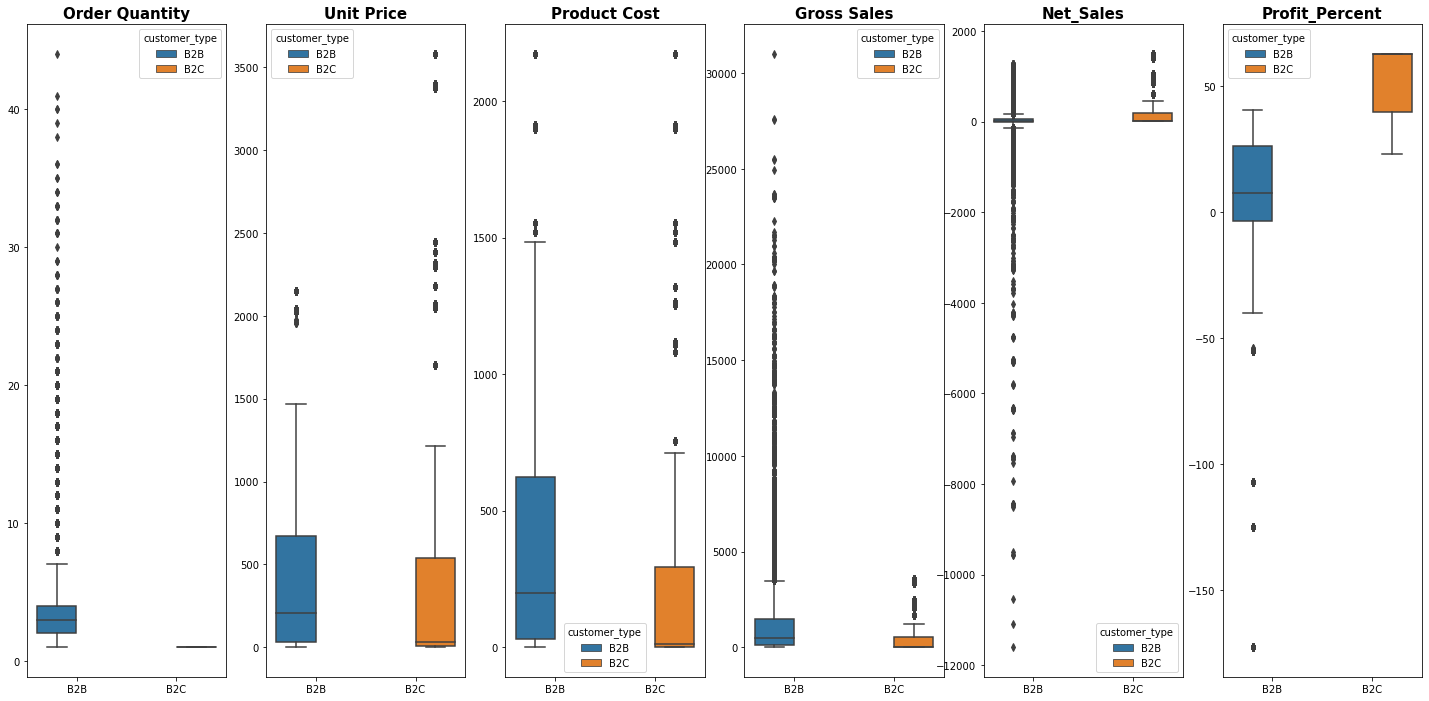

In [21]:
fig, axes2 = plt.subplots(nrows=1, ncols=6, figsize=(25,12))
Cont_Features = ['Order Quantity','Unit Price','Product Cost','Gross Sales','Net_Sales','Profit_Percent']

for i, column in enumerate(Cont_Features):
    axes2[i].set_title(column ,fontweight="bold", fontsize=15)
    sns.boxplot(ax=axes2[i], x='customer_type' ,y=column, data=sales_data, hue='customer_type')
    axes2[i].set_xlabel("")  
    axes2[i].set_ylabel("") 


### * ***  Evidence 1: Net Sale & Profit percent for B2C is higher than B2B.  *** *

1. B2C is making **minimum** of **20% profit** with each sale; and most profit range between **20% to 70%**.
2. B2B **average profit** percent seems to be around **5%** and most profit range between **-1% to 21%**.


In [22]:
#sales_data.columns

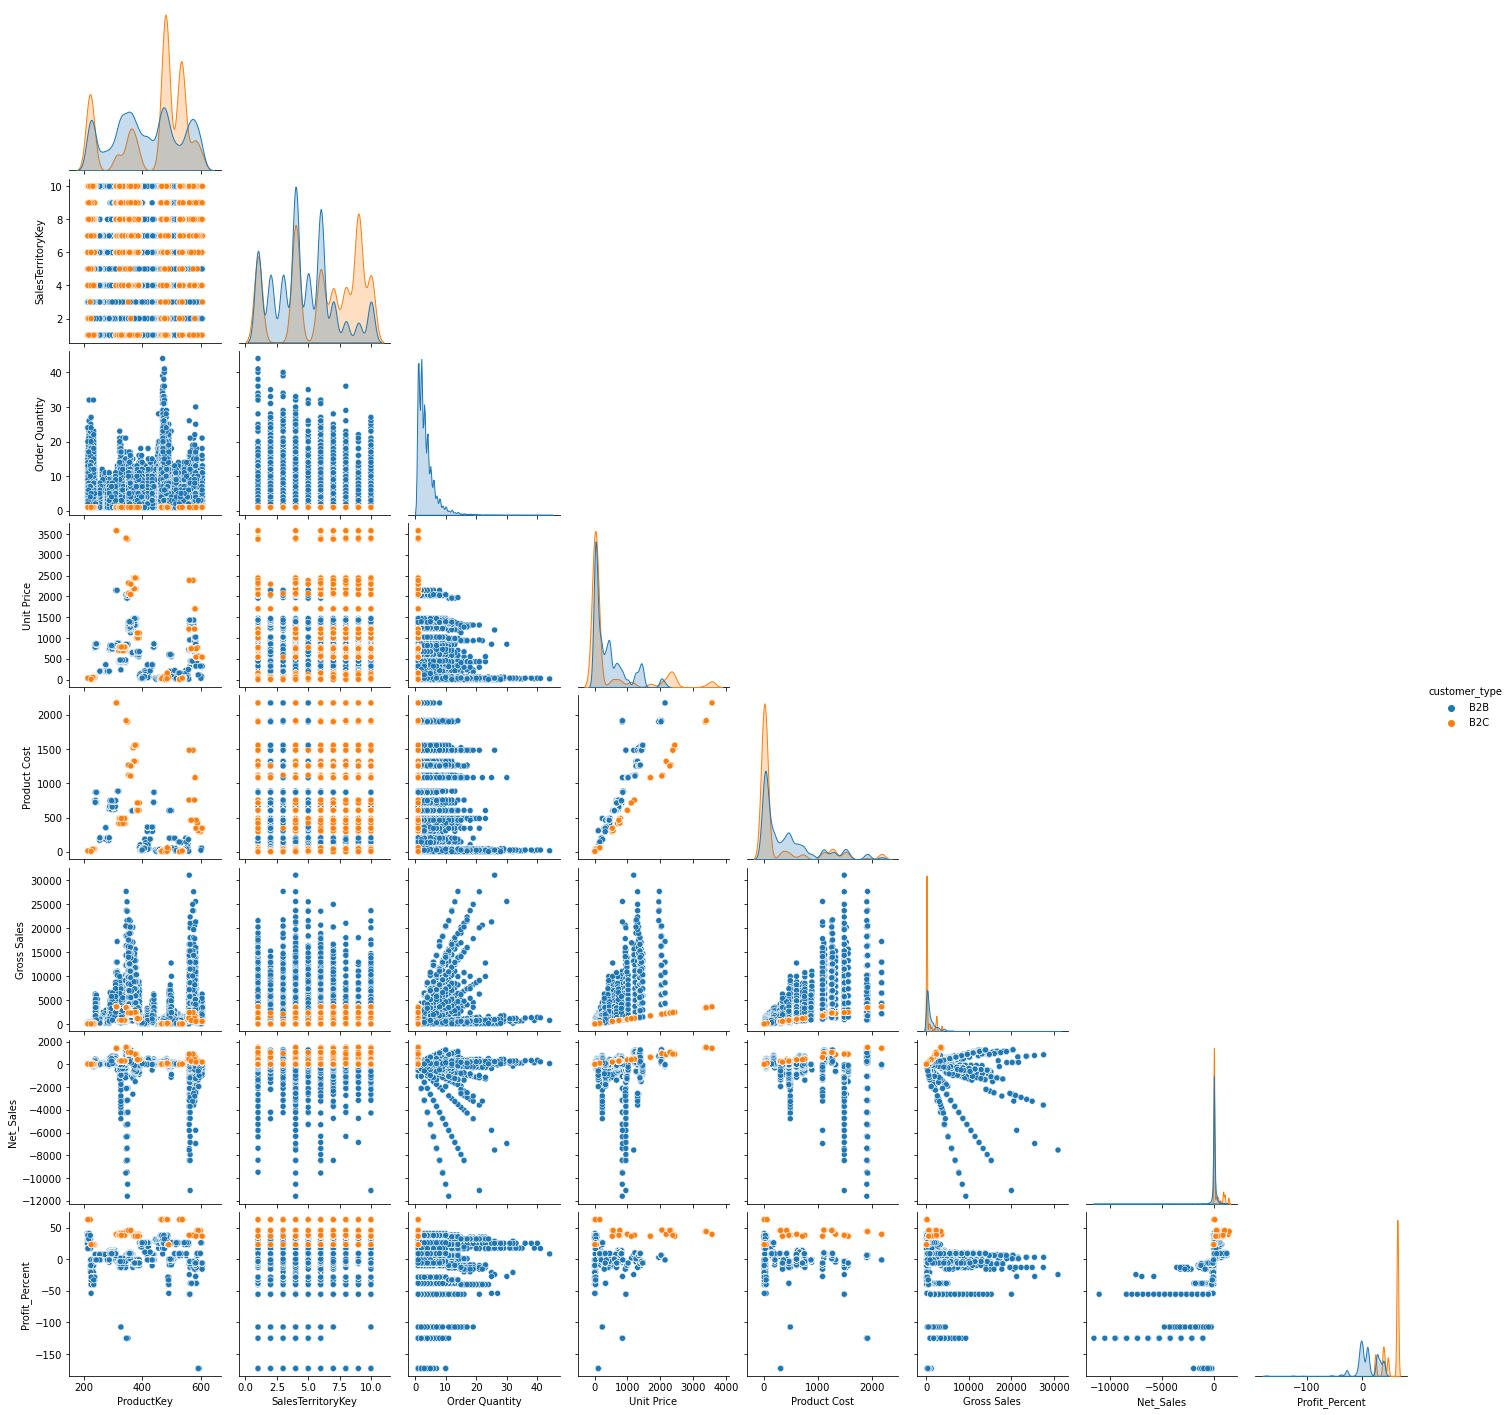

In [23]:
sns.pairplot(sales_data.drop(['SalesOrderLineKey', 'ResellerKey', 'CustomerKey', 'OrderDateKey', 'DueDateKey', 'ShipDateKey'], axis=1), hue="customer_type", corner=True)


### * ***  Evidence 2: Net Sale & Profit percent for B2C is higher than B2B.  *** *

In [24]:
sales_data_copy.columns

Index(['OrderDateKey', 'DueDateKey', 'ShipDateKey', 'Order Quantity',
       'Unit Price', 'Product Cost', 'Gross Sales', 'customer_type',
       'Net_Sales', 'Profit_Percent', 'Region', 'Country', 'Group',
       'Fiscal Year', 'Fiscal Quarter', 'Month', 'Full Date', 'Subcategory',
       'Category', 'Reseller', 'Customer', 'Year', 'Total Cost'],
      dtype='object')

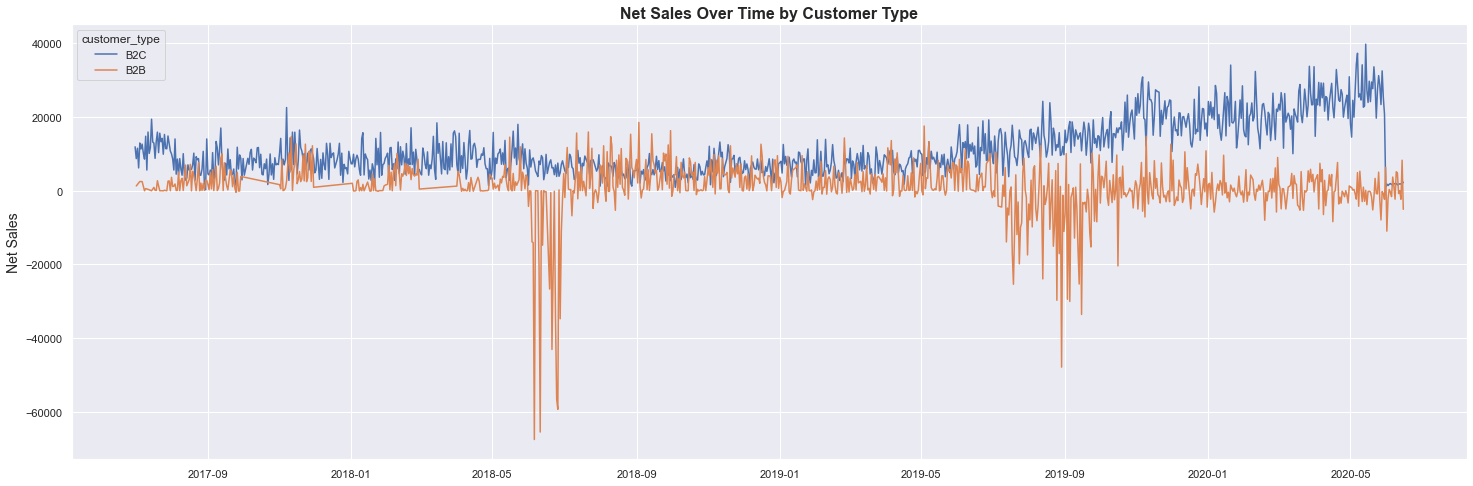

In [25]:
net_sales_by_date = sales_data_copy.groupby(['OrderDateKey', 'customer_type'])['Net_Sales'].sum().reset_index()

sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(25,8))
sns.lineplot(ax=ax, x="OrderDateKey", y="Net_Sales", hue="customer_type", data=net_sales_by_date)
ax.set_title("Net Sales Over Time by Customer Type", fontsize=16, fontweight="bold")
ax.set_ylabel("Net Sales", fontsize=14)
ax.set_xlabel("")
plt.show()


### * ***  Evidence 3.a: Sales over time is mostly higher for B2C w.r.t B2B.*** *

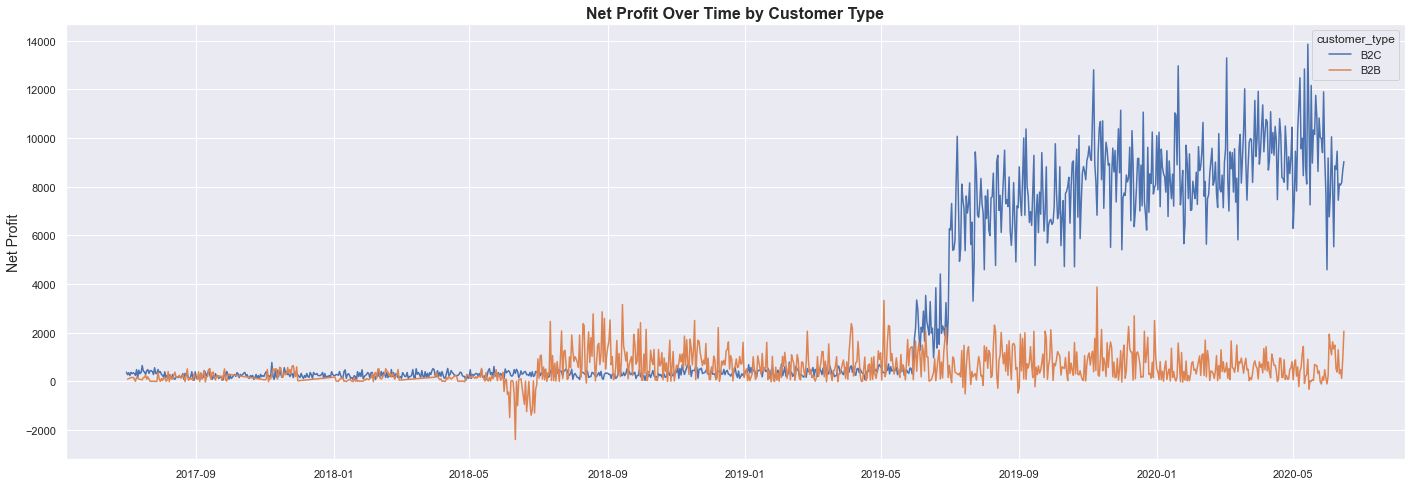

In [26]:
net_profit_by_date = sales_data_copy.groupby(['OrderDateKey', 'customer_type'])['Profit_Percent'].sum().reset_index()

sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(24,8))
sns.lineplot(ax=ax, x="OrderDateKey", y="Profit_Percent", hue="customer_type", data=net_profit_by_date)
ax.set_title("Net Profit Over Time by Customer Type", fontsize=16, fontweight="bold")
ax.set_xlabel("")
ax.set_ylabel("Net Profit", fontsize=14)
plt.show()


### * ***  Evidence 3.b: Profit has increased significantly for B2C types of customer from May 2019.   *** *

## Hypothesis Testing using Two-sample t-test

**Null Hypothesis:** *There is **NO** significant difference between the mean net sales of B2B and B2C customers.*

**Alternate Hypothesis:** *There **IS** significant difference between the mean net sales of B2B and B2C customers.*

In [27]:
from scipy import stats

b2b_sales = sales_data_copy[sales_data_copy['customer_type'] == 'B2B']['Net_Sales']
b2c_sales = sales_data_copy[sales_data_copy['customer_type'] == 'B2C']['Net_Sales']

t_statistic, p_value = stats.ttest_ind(b2b_sales, b2c_sales, equal_var=False)

print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

if p_value < 0.05:
    print('Null Hypothesis Rejected. \n\t There is a significant difference in the mean net sales of B2B and B2C customers.')
else:
    print('Failed to reject Null Hypothesis. \n\t There is no significant difference in the mean net sales of B2B and B2C customers.')


T-Statistic: -91.22277880123647
P-Value: 0.0
Null Hypothesis Rejected. 
	 There is a significant difference in the mean net sales of B2B and B2C customers.


### * ***  Evidence 4: Statistically proven that there is a significant difference between net sale for B2B and B2C customers.  *** *

In [28]:
b2c_sales_data = sales_data_copy[sales_data_copy['customer_type'] == 'B2C']
b2b_sales_data = sales_data_copy[sales_data_copy['customer_type'] == 'B2B']


In [29]:
## Lets calculate how much B2C segment contribute to the total sales to better conclude on given question.

# total net sales
total_net_sales = sales_data_copy['Net_Sales'].sum()

# net sales for B2C segment
b2c_net_sales = sales_data_copy[sales_data_copy['customer_type'] == 'B2C']['Net_Sales'].sum()

# net sales for B2B segment
b2b_net_sales = sales_data_copy[sales_data_copy['customer_type'] == 'B2B']['Net_Sales'].sum()

# Calculate percentage contribution of B2C segment to total net sales
b2c_contribution = (b2c_net_sales / total_net_sales) * 100

print(f'Total net sales: ${total_net_sales:,.2f}')
print(f'Net sales for B2C segment: ${b2c_net_sales:,.2f}')
print(f'Net sales for B2B segment: ${b2b_net_sales:,.2f}')
print(f'\n\nContribution of B2C segment to total net sales: {b2c_contribution:.2f}%')


Total net sales: $13,078,874.14
Net sales for B2C segment: $12,080,883.64
Net sales for B2B segment: $997,990.49


Contribution of B2C segment to total net sales: 92.37%


### * ***  Evidence 4.1: B2C segment is the major contributor to company's net sales with the contribution of 92.37%. With that said, B2B is just contributing 7.63%  to overall net sales. *** *

In [30]:
# Grouping the data by year and quarter for both B2C and B2B segments
b2c_profit_by_year = b2c_sales_data.groupby('Fiscal Year')['Profit_Percent'].mean() * 100
b2c_profit_by_quarter = b2c_sales_data.groupby('Fiscal Quarter')['Profit_Percent'].mean() * 100

b2b_profit_by_year = b2b_sales_data.groupby('Fiscal Year')['Profit_Percent'].mean() * 100
b2b_profit_by_quarter = b2b_sales_data.groupby('Fiscal Quarter')['Profit_Percent'].mean() * 100

print("B2C Profit Percent by Year:")
print(b2c_profit_by_year)

print("\nB2B Profit Percent by Year:")
print(b2b_profit_by_year)

print("\nB2C Profit Percent by Quarter:")
print(b2c_profit_by_quarter)

print("\nB2B Profit Percent by Quarter:")
print(b2b_profit_by_quarter)

B2C Profit Percent by Year:
Fiscal Year
FY2018    4030.196592
FY2019    4426.565578
FY2020    5469.382433
Name: Profit_Percent, dtype: float64

B2B Profit Percent by Year:
Fiscal Year
FY2018     307.622534
FY2019    1273.398011
FY2020     756.126897
Name: Profit_Percent, dtype: float64

B2C Profit Percent by Quarter:
Fiscal Quarter
FY2018 Q1    4023.779820
FY2018 Q2    4030.967563
FY2018 Q3    4023.881000
FY2018 Q4    4040.915998
FY2019 Q1    4058.062761
FY2019 Q2    4107.960601
FY2019 Q3    4148.803185
FY2019 Q4    4787.639486
FY2020 Q1    5536.775039
FY2020 Q2    5455.203341
FY2020 Q3    5434.046945
FY2020 Q4    5463.045522
Name: Profit_Percent, dtype: float64

B2B Profit Percent by Quarter:
Fiscal Quarter
FY2018 Q1     594.810974
FY2018 Q2     535.011531
FY2018 Q3     446.723641
FY2018 Q4    -244.115332
FY2019 Q1    1301.090185
FY2019 Q2    1291.367925
FY2019 Q3    1132.284086
FY2019 Q4    1320.372579
FY2020 Q1     708.321483
FY2020 Q2     967.540234
FY2020 Q3     823.275713
FY2020 

### * ***  Evidence 4.2: Overall sales for B2B is lesser than B2C. There is no impact of any quarter or season on the net sales value for B2B.  *** *

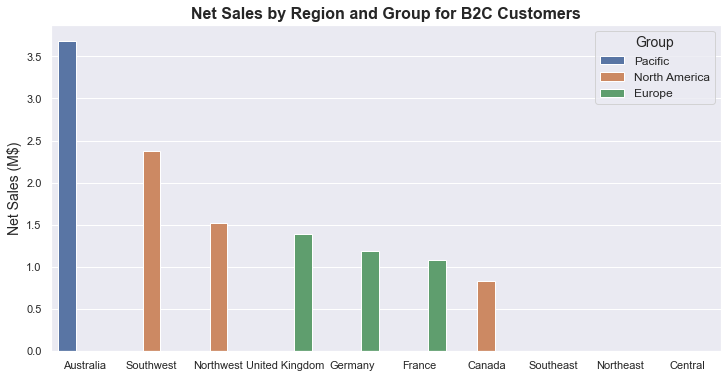

In [31]:
## lets check net sales region wise and group wise for B2C.
b2c_sales_territory = sales_data_copy[sales_data_copy['customer_type'] == 'B2C'].groupby(['Region', 'Group'])['Net_Sales'].sum().sort_values(ascending=False).reset_index()
## Converting Net Sales to convert in M$ unit
b2c_sales_territory['Net_Sales'] = b2c_sales_territory['Net_Sales']/1e6


fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Region', y='Net_Sales', hue='Group', data=b2c_sales_territory)
plt.title('Net Sales by Region and Group for B2C Customers', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Net Sales (M$)', fontsize=14)
plt.legend(title='Group', fontsize=12, title_fontsize=14)
plt.show()


### B2C has highest sales in Australia region worth more than 3.5 Million Dollars.

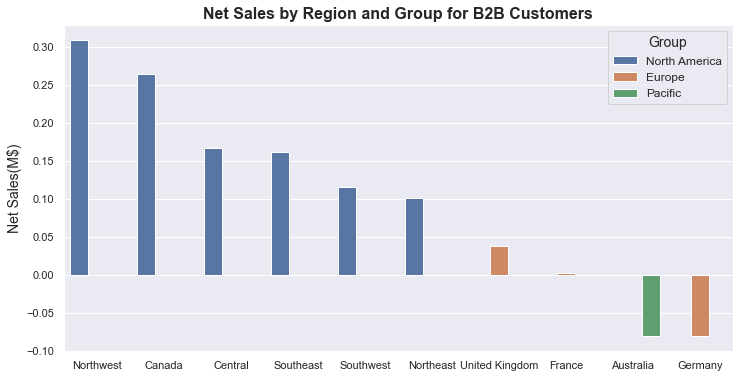

In [32]:
## lets check net sales region wise and group wise for B2B.
b2b_sales_territory = sales_data_copy[sales_data_copy['customer_type'] == 'B2B'].groupby(['Region', 'Group'])['Net_Sales'].sum().sort_values(ascending=False).reset_index()
## Converting Net Sales to convert in M$ unit
b2b_sales_territory['Net_Sales'] = b2b_sales_territory['Net_Sales']/1e6

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='Region', y='Net_Sales', hue='Group', data=b2b_sales_territory)
plt.title('Net Sales by Region and Group for B2B Customers', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Net Sales(M$)', fontsize=14)
plt.legend(title='Group', fontsize=12, title_fontsize=14)
plt.show()


### B2B has major business in North America Group and it worth around 0.3 Million Dollars.

In [33]:
# create empty DataFrames to store the results
b2b_results_df = pd.DataFrame(columns=['Fiscal Year', 'Top', 'Reseller'])
b2c_results_df = pd.DataFrame(columns=['Fiscal Year', 'Top', 'Customer'])

# loop over the fiscal years
for year in sales_data_copy['Fiscal Year'].unique():
    # filter data for the current fiscal year
    fy_sales_data = sales_data_copy[sales_data_copy['Fiscal Year'] == year]

    # get top 3 resellers and customers based on Net Sales
    top_resellers = fy_sales_data[fy_sales_data['customer_type'] == 'B2B'].groupby('Reseller')['Net_Sales'].sum().nlargest(3)
    top_customers = fy_sales_data[fy_sales_data['customer_type'] == 'B2C'].groupby('Customer')['Net_Sales'].sum().nlargest(3)

    # add the results to the DataFrames
    for i, (name, net_sales) in enumerate(top_resellers.iteritems()):
        b2b_results_df = b2b_results_df.append({'Fiscal Year': year, 'Top': i+1, 'Reseller': name}, ignore_index=True)
    for i, (name, net_sales) in enumerate(top_customers.iteritems()):
        b2c_results_df = b2c_results_df.append({'Fiscal Year': year, 'Top': i+1, 'Customer': name}, ignore_index=True)


# merge the two data frames on Fiscal Year and Top
combined_df = b2b_results_df.merge(b2c_results_df, on=['Fiscal Year', 'Top'])

# rename columns for clarity
combined_df = combined_df.rename(columns={
    'Reseller': 'Top B2B Reseller',
    'Customer': 'Top B2C Customer'
})

# select and reorder columns
combined_df = combined_df[['Fiscal Year', 'Top', 'Top B2B Reseller', 'Top B2C Customer']]

combined_df

,Fiscal Year,Top,Top B2B Reseller,Top B2C Customer
0,FY2018,1,Hardware Components,Aaron Allen
1,FY2018,2,Tread Industries,Abby Sai
2,FY2018,3,eCommerce Bikes,Abigail Perry
3,FY2019,1,Top Sports Supply,Janet Munoz
4,FY2019,2,Commercial Sporting Goods,Maurice Shan
5,FY2019,3,Vigorous Exercise Company,Lacey Zheng
6,FY2020,1,Field Trip Store,Jordan Turner
7,FY2020,2,Top Sports Supply,Rosa Hu
8,FY2020,3,Registered Cycle Store,Franklin Xu


In [34]:
# # Grouping data by group, category, and subcategory columns and checking the net sales
# b2b_sales_by_group = b2b_sales_data.groupby(['Group', 'Category', 'Subcategory'])['Net_Sales'].sum().reset_index()

# b2b_sales_by_group


In [35]:
b2c_sales_data = b2c_sales_data.round(2)

# create a pivot table with Category and Subcategory as rows, and Fiscal Year and Fiscal Quarter as columns
B2C_pivoted_sales = pd.pivot_table(b2c_sales_data, values='Net_Sales', index=['Category', 'Subcategory'], 
                                   columns=['Fiscal Year', 'Fiscal Quarter'], aggfunc='sum', fill_value = '-')



B2C_pivoted_sales


Fiscal Year                       FY2018                                   \
Fiscal Quarter                 FY2018 Q1  FY2018 Q2  FY2018 Q3  FY2018 Q4   
Category    Subcategory                                                     
Accessories Bike Racks                 -          -          -          -   
            Bike Stands                -          -          -          -   
            Bottles and Cages          -          -          -          -   
            Cleaners                   -          -          -          -   
            Fenders                    -          -          -          -   
            Helmets                    -          -          -          -   
            Hydration Packs            -          -          -          -   
            Tires and Tubes            -          -          -          -   
Bikes       Mountain Bikes     151223.62  158564.36  145195.68  183066.51   
            Road Bikes         638229.85   603913.2  615718.17   549264.8   
            Touring Bikes              -          -          -          -   
Clothing    Caps                       -          -          -          -   
            Gloves                     -          -          -          -   
            Jerseys                    -          -          -          -   
            Shorts                     -          -          -          -   
            Socks                      -          -          -          -   
            Vests                      -          -          -          -   

Fiscal Year                       FY2019                                   \
Fiscal Quarter                 FY2019 Q1  FY2019 Q2  FY2019 Q3  FY2019 Q4   
Category    Subcategory                                                     
Accessories Bike Racks                 -          -          -     676.08   
            Bike Stands                -          -          -     398.12   
            Bottles and Cages          -          -          -    1105.45   
            Cleaners                   -          -          -      99.60   
            Fenders                    -          -          -     688.00   
            Helmets                    -          -          -    3109.80   
            Hydration Packs            -          -          -     653.98   
            Tires and Tubes            -          -          -    2324.82   
Bikes       Mountain Bikes     170685.69  236983.01  311134.75  419711.24   
            Road Bikes         364992.54  324353.12  320328.74  344101.65   
            Touring Bikes              -          -          -   50957.39   
Clothing    Caps                       -          -          -     107.64   
            Gloves                     -          -          -     337.26   
            Jerseys                    -          -          -     953.58   
            Shorts                     -          -          -     219.05   
            Socks                      -          -          -      33.78   
            Vests                      -          -          -     596.25   

Fiscal Year                       FY2020                                   
Fiscal Quarter                 FY2020 Q1  FY2020 Q2  FY2020 Q3  FY2020 Q4  
Category    Subcategory                                                    
Accessories Bike Racks           5859.36    5108.16    5784.24    7211.52  
            Bike Stands          6668.51    6369.92    6668.51    4677.91  
            Bottles and Cages    7335.76    9125.67    9935.36    8033.85  
            Cleaners             1040.82    1215.12    1030.86    1135.44  
            Fenders              6467.20    7719.36    7045.12    7265.28  
            Helmets             30178.20   35740.80   37602.30   34404.90  
            Hydration Packs      5920.24    5954.66    6574.22    6126.76  
            Tires and Tubes     35922.46   39484.52   39664.26   36272.51  
Bikes       Mountain Bikes     506595.56  731579.18  797886.96  700997.97  
      

- Major sales in B2C segment is coming from the category: **Bike**.

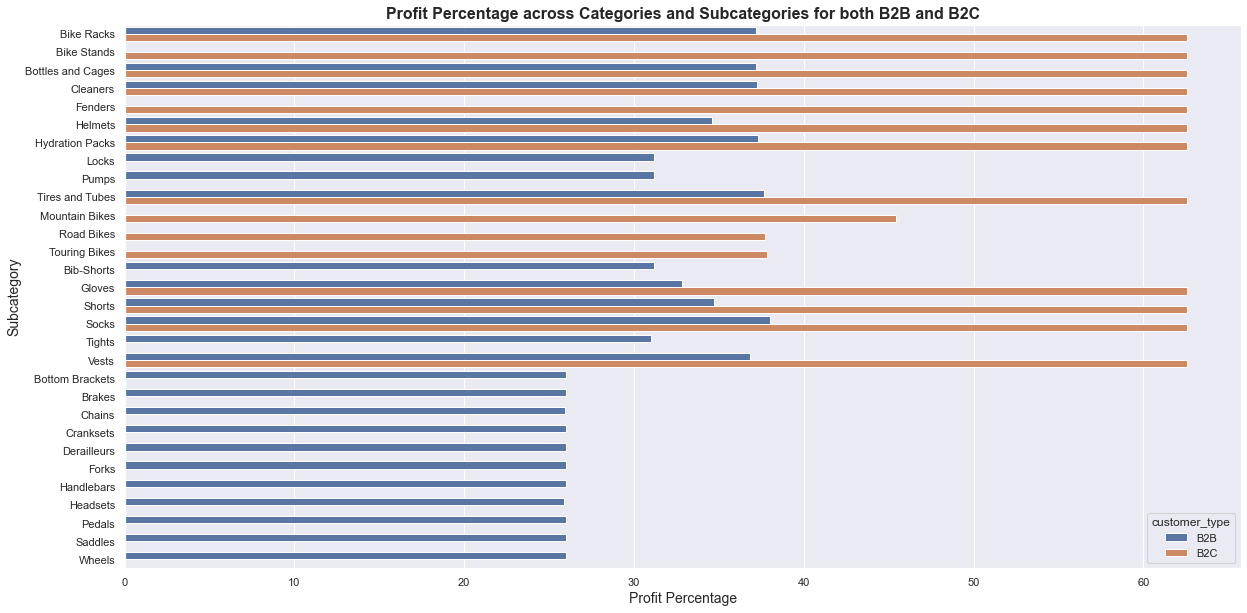

In [36]:
# pivot table grouped by category and subcategory
pivot_table = pd.pivot_table(sales_data_copy, values='Profit_Percent', index=['Category', 'Subcategory', 'customer_type'], aggfunc=np.mean)

# Considering only subcategories making profit more than 25%
pivot_table = pivot_table[pivot_table['Profit_Percent'] > 25].reset_index()

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=pivot_table, x='Profit_Percent', y='Subcategory', hue='customer_type')
plt.title('Profit Percentage across Categories and Subcategories for both B2B and B2C', fontsize=16, fontweight='bold')
plt.xlabel('Profit Percentage', fontsize=14)
plt.ylabel('Subcategory', fontsize=14)
plt.show()


### B2B segment makes great profit in the category of "Accessories" gaining at least 25% of profit per subcategory.

In [37]:
#pivot_table

In [38]:
# Filter the data for B2B customers and for the Bike and Clothing categories
b2b_bike_clothing_sales_data = sales_data_copy[(sales_data_copy['customer_type'] == 'B2B') & (sales_data_copy['Category'].isin(['Bikes', 'Clothing','Components','Accessories']))]

# total sales for each category in B2B
category_sales = b2b_bike_clothing_sales_data.groupby('Category')['Net_Sales'].sum()

# total sales for the entire company
total_sales = sales_data_copy['Net_Sales'].sum()

# Calculate the % of total sales for each category
category_sales_pct = ((category_sales / total_sales) * 100).round(2)

category_sales_pct


Category
Accessories    1.55
Bikes         -3.79
Clothing       1.94
Components     7.94
Name: Net_Sales, dtype: float64

### * ***    Outcome from above analysis:   *** *

- **B2C** customer segment brings **major revenue and high profit** to the company. However, we cannot deny on facts:
    - Contribution of B2B segment to total net sales: **7.63%**.
    - Company is making major **loss with selling bikes to B2B customers**, so we just focus on **"Components"** alone B2B can contribute upto **8%** in total net sales.
    
- It is a wise proposition to conclude that: 'Company should continue working in both B2C and B2B. If needed, company should target certain categories like **Components, Accessories and Clotthing** which contribute upto **10%** to total net sale.


## Data Preprocessing

In [39]:
sales_data.head(2)

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,customer_type,Net_Sales,Profit_Percent
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.994,1898.0944,2024.994,B2B,126.8996,6.266665
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.994,1898.0944,6074.982,B2B,380.6988,6.266665


In [40]:
## checking for duplicate entries, if there is any
sales_data[sales_data.duplicated()]

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,customer_type,Net_Sales,Profit_Percent


In [41]:
## Removing mapping keepings to prep data from modeling

sales_data = sales_data.drop(['ResellerKey', 'CustomerKey','SalesOrderLineKey'], axis=1)
sales_data.head(2)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,customer_type,Net_Sales,Profit_Percent
0,349,20170702,20170712,20170709.0,5,1,2024.994,1898.0944,2024.994,B2B,126.8996,6.266665
1,350,20170702,20170712,20170709.0,5,3,2024.994,1898.0944,6074.982,B2B,380.6988,6.266665


In [42]:
## We don't need to encode customer_type as we just going to work on B2B customer so ultimately will drop that constant feature.

# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# # Encoding the customer_type column
# sales_data['customer_type_encoded'] = encoder.fit_transform(sales_data['customer_type'])
# sales_data = sales_data.drop(['customer_type'], axis=1)
# sales_data.head()


In [43]:
b2c_sales_data = sales_data[sales_data['customer_type'] == 'B2C'].reset_index(drop=True)
b2c_sales_data.tail(2)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,customer_type,Net_Sales,Profit_Percent
60396,486,20200615,20200625,NaN,6,1,159.00,59.4660,159.00,B2C,99.5340,62.6
60397,225,20200615,20200625,NaN,6,1,8.99,6.9223,8.99,B2C,2.0677,23.0


In [44]:
## We don't need dates to make prediction, instead we can take transaction month, as our major revenue is from the sale of bikes and it is related to the season.

b2c_sales_data['OrderDateKey'] = pd.to_datetime(b2c_sales_data['OrderDateKey'], format='%Y%m%d')
b2c_sales_data['Month'] = b2c_sales_data['OrderDateKey'].dt.month

## Rounding float values to limit till 2 decimals
b2c_sales_data = b2c_sales_data.round(2)

## Dropping shipping date column - as not relevant and customer type - as it is a constant value
b2c_sales_data.drop(['ShipDateKey','customer_type','DueDateKey','ProductKey'], axis =1, inplace = True)
b2c_sales_data



,OrderDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,Net_Sales,Profit_Percent,Month
0,2017-07-01,6,1,3578.27,2171.29,3578.27,1406.98,39.32,7
1,2017-07-01,7,1,3399.99,1912.15,3399.99,1487.84,43.76,7
2,2017-07-01,1,1,3399.99,1912.15,3399.99,1487.84,43.76,7
3,2017-07-01,4,1,699.10,413.15,699.10,285.95,40.90,7
4,2017-07-01,9,1,3399.99,1912.15,3399.99,1487.84,43.76,7
...,...,...,...,...,...,...,...,...,...
60393,2020-06-15,6,1,21.98,8.22,21.98,13.76,62.60,6
60394,2020-06-15,6,1,8.99,6.92,8.99,2.07,23.00,6
60395,2020-06-15,6,1,21.98,8.22,21.98,13.76,62.60,6
60396,2020-06-15,6,1,159.00,59.47,159.00,99.53,62.60,6


In [45]:
b2c_sales_data.isnull().sum()

OrderDateKey         0
SalesTerritoryKey    0
Order Quantity       0
Unit Price           0
Product Cost         0
Gross Sales          0
Net_Sales            0
Profit_Percent       0
Month                0
dtype: int64

In [46]:
corr = b2c_sales_data.drop('Net_Sales', axis=1).corrwith(b2b_sales_data['Net_Sales'])
corr

## It seems purchase month and territory affects the sales in B2C segment.

SalesTerritoryKey    0.009058
Order Quantity            NaN
Unit Price           0.070863
Product Cost         0.071825
Gross Sales          0.070863
Profit_Percent      -0.038125
Month               -0.111941
dtype: float64

In [47]:
b2c_sales_data.columns


Index(['OrderDateKey', 'SalesTerritoryKey', 'Order Quantity', 'Unit Price',
       'Product Cost', 'Gross Sales', 'Net_Sales', 'Profit_Percent', 'Month'],
      dtype='object')

In [48]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = ['Order Quantity', 'Unit Price', 'Product Cost', 'Gross Sales', 'Net_Sales', 'Profit_Percent']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical columns and transform the data
b2c_sales_data[numerical_cols] = scaler.fit_transform(b2c_sales_data[numerical_cols])


In [49]:
b2c_sales_data

,OrderDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,Net_Sales,Profit_Percent,Month
0,2017-07-01,6,0.0,3.330363,3.412464,3.330363,3.184947,-1.025415,7
1,2017-07-01,7,0.0,3.138351,2.943392,3.138351,3.398322,-0.700954,7
2,2017-07-01,1,0.0,3.138351,2.943392,3.138351,3.398322,-0.700954,7
3,2017-07-01,4,0.0,0.229421,0.230035,0.229421,0.226753,-0.909954,7
4,2017-07-01,9,0.0,3.138351,2.943392,3.138351,3.398322,-0.700954,7
...,...,...,...,...,...,...,...,...,...
60393,2020-06-15,6,0.0,-0.499855,-0.502934,-0.499855,-0.491507,0.675816,6
60394,2020-06-15,6,0.0,-0.513846,-0.505287,-0.513846,-0.522354,-2.218031,6
60395,2020-06-15,6,0.0,-0.499855,-0.502934,-0.499855,-0.491507,0.675816,6
60396,2020-06-15,6,0.0,-0.352281,-0.410165,-0.352281,-0.265175,0.675816,6


In [50]:
b2c_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60398 entries, 0 to 60397
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OrderDateKey       60398 non-null  datetime64[ns]
 1   SalesTerritoryKey  60398 non-null  int64         
 2   Order Quantity     60398 non-null  float64       
 3   Unit Price         60398 non-null  float64       
 4   Product Cost       60398 non-null  float64       
 5   Gross Sales        60398 non-null  float64       
 6   Net_Sales          60398 non-null  float64       
 7   Profit_Percent     60398 non-null  float64       
 8   Month              60398 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 4.1 MB


## Data Modelling

## 1. Linear Regression:

**Rolling Window Approach:**

The rolling window approach is a technique commonly used in time series analysis and machine learning to create a sequence of sub-samples from a single data set. This approach involves splitting the data into a fixed-sized window and moving the window forward by a certain number of time steps to create a new subset of data. The process is then repeated with the new subset, creating a sequence of sub-samples that can be used for analysis.

In [51]:
## Implementing sales forecasting with rolling window.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set the window size
window_size = 3

# Create a new dataframe with the rolling window data
rolling_data = pd.DataFrame()
for i in range(window_size, len(b2c_sales_data)):
    row = {}
    for j in range(i - window_size, i):
        for column in b2c_sales_data.columns:
            if column != 'OrderDateKey':
                key = f'{column}_{j-i+window_size}'
                #print(key)
                row[key] = b2c_sales_data[column][j]
    rolling_data = rolling_data.append(row, ignore_index=True)

In [59]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X = rolling_data.drop(['Net_Sales_2'], axis=1)
y = rolling_data['Net_Sales_2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Print the mean squared error of the model
mse = np.mean((y_pred - y_test) ** 2)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}') #mse:.10f
print(f'Root Mean Squared Error: {rmse}')  #rmse:.10f


Mean Squared Error: 3.9504303242525493e-29
Root Mean Squared Error: 6.285244883258368e-15


## What is SARIMAX?

SARIMAX, which stands for Seasonal Autoregressive Integrated Moving Average with eXogenous variables, is a statistical model used for time series forecasting. It is an extension of the ARIMA (Autoregressive Integrated Moving Average) model that includes seasonal components and external regressors.

The SARIMAX model is used to forecast time series data that exhibit seasonal patterns and may be influenced by external factors, such as weather or economic indicators. 

**Referencing:**
- https://builtin.com/data-science/time-series-forecasting-python
- https://towardsdatascience.com/end-to-end-time-series-analysis-and-forecasting-a-trio-of-sarimax-lstm-and-prophet-part-1-306367e57db8#:~:text=What%20is%20SARIMAX%3F,%2Daverage%20term%20(MA).

In [53]:
b2c_sales_data_copy = b2c_sales_data.copy()
b2c_sales_data_copy = b2c_sales_data_copy.set_index('OrderDateKey')
#b2c_sales_data_copy

In [54]:
train = b2c_sales_data[b2c_sales_data_copy.index < pd.to_datetime("2020-02-01", format='%Y-%m-%d')]
test = b2c_sales_data[b2c_sales_data_copy.index > pd.to_datetime("2020-02-01", format='%Y-%m-%d')]


In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['Net_Sales']
model = SARIMAX(y, order = (1, 0, 1))
model = model.fit()

y_pred = model.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = model.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

rmse = np.sqrt(mean_squared_error(test["Net_Sales"].values, y_pred_df["Predictions"]))
print("RMSE: ",rmse)

## Referencing: https://builtin.com/data-science/time-series-forecasting-python

RMSE:  0.7597582415716913
